In [103]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [104]:
def read_csv_file(filepath):
    file = open(filepath)
    read_csv = csv.reader(file)
    next(read_csv)
    rows = []
    for row in read_csv:
        rows.append(row)
        row.pop(0)
    return rows

rows = read_csv_file("lab_1_test.csv")
x_col = [float(row[0]) for row in rows]
y_col = [float(row[1]) for row in rows]

In [105]:
rows

[['0.6060606060606061', '21.068368940767623'],
 ['0.6161616161616162', '21.176625539324085'],
 ['0.6262626262626263', '20.920624760323445'],
 ['0.6363636363636365', '20.91386528550307'],
 ['0.6464646464646465', '21.536687039647553'],
 ['0.6565656565656566', '21.720003321702563'],
 ['0.6666666666666667', '21.31173029685923'],
 ['0.6767676767676768', '21.65459522290296'],
 ['0.686868686868687', '21.482228181251664'],
 ['0.696969696969697', '21.20040346755786'],
 ['0.7070707070707072', '21.52256009579394'],
 ['0.7171717171717172', '21.895754404283228'],
 ['0.7272727272727273', '21.443797642812466'],
 ['0.7373737373737375', '21.944140571491676'],
 ['0.7474747474747475', '20.70902596372257'],
 ['0.7575757575757577', '21.761722266464083'],
 ['0.7676767676767677', '21.561467655824988'],
 ['0.7777777777777778', '21.4658533504158'],
 ['0.787878787878788', '21.603285808718226'],
 ['0.797979797979798', '20.999688921579327'],
 ['0.8080808080808082', '21.550260049810362'],
 ['0.8181818181818182', '

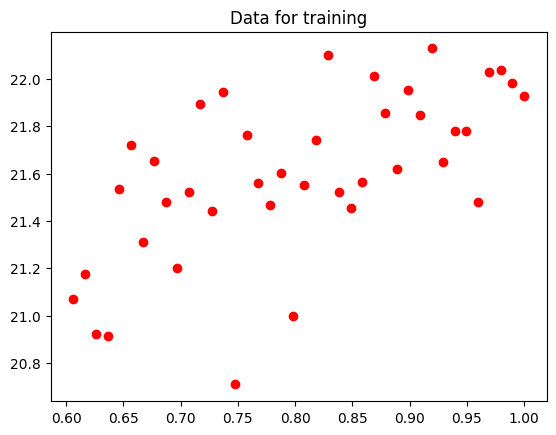

In [106]:
plt.title("Data for training")
plt.plot(x_col, y_col, 'ro')

In [107]:
tolerance = 0.000001
learning_rate = 0.01

def line_regression(b0, b1, x):
    return b0 + np.multiply(b1, x)

def loss_function(predicted, actual):
    result = 0
    for i in range(0, len(predicted)):
        result += (predicted[i] - actual[i]) ** 2
    return result / len(predicted)

def train(rows):
    b0 = float(np.random.randn(1))
    b1 = float(np.random.randn(1))
    x_col = []
    y_col = []

    for row in rows:
        x_col.append(float(row[0]))
        y_col.append(float(row[1]))
    predicted_y = []

    for x in x_col:
        predicted_y.append(line_regression(b0, b1, x))
    loss = loss_function(predicted_y, y_col)
    delta = 100
    epoch_number = 0

    while tolerance < delta:
        predicted_y = []

        for x in x_col:
            predicted_y.append(line_regression(b0, b1, x))
        diff = [(expected - predicted) for (expected, predicted) in zip(y_col, predicted_y)]
        derivat_b0 = - (2 / len(diff)) * np.sum(diff)
        sum = 0

        for (x_value, y_diff) in zip(x_col, diff):
            sum += x_value * y_diff
        derivat_b1 = - (2 / len(diff)) * sum
        b0 = b0 - learning_rate * derivat_b0
        b1 = b1 - learning_rate * derivat_b1
        predicted_y = []

        for x in x_col:
            predicted_y.append(line_regression(b0, b1, x))
        current_loss = loss_function(predicted_y, y_col)
        delta = loss - current_loss
        loss = current_loss
        print("Epoch %s: b0 = %s; b1 = %s; Loss function value = %s;" % (epoch_number, b0, b1, current_loss))
        epoch_number += 1

    return {
        "b0" : b0,
        "b1" : b1
    }

beta_obj = train(rows)
beta_obj

Epoch 0: b0 = -1.5674925193452611; b1 = 1.268668864204942; Loss function value = 490.54466571272604;
Epoch 1: b0 = -1.124562853299773; b1 = 1.624518093740753; Loss function value = 458.79583627569554;
Epoch 2: b0 = -0.6962069348677392; b1 = 1.9685674029838993; Loss function value = 429.1080882012601;
Epoch 3: b0 = -0.28194377522552405; b1 = 2.3012062490636542; Loss function value = 401.34761754168153;
Epoch 4: b0 = 0.11869173975650538; b1 = 2.622811235351266; Loss function value = 375.38930680774274;
Epoch 5: b0 = 0.5061493734470022; b1 = 2.9337465356891315; Loss function value = 351.11616104994675;
Epoch 6: b0 = 0.8808640450946263; b1 = 3.2343643046185866; Loss function value = 328.4187805489307;
Epoch 7: b0 = 1.2432563197477038; b1 = 3.5250050740684196; Loss function value = 307.1948677384468;
Epoch 8: b0 = 1.5937328820044345; b1 = 3.80599813695096; Loss function value = 287.3487661385602;
Epoch 9: b0 = 1.932686994127311; b1 = 4.077661918097853; Loss function value = 268.791029220978

{'b0': 19.714920773260896, 'b1': 2.3407630879710823}

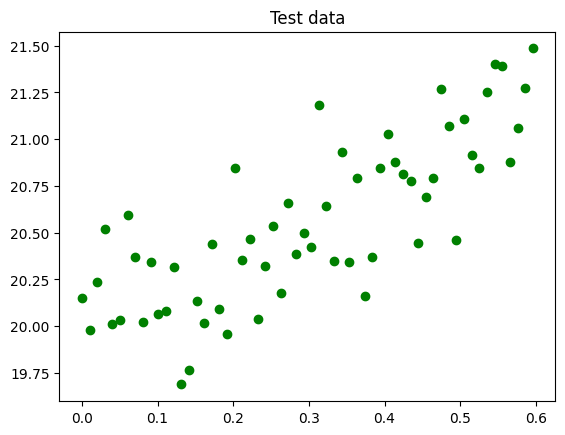

In [108]:
test_rows = read_csv_file("lab_1_train.csv")
test_x = [float(row[0]) for row in test_rows]
test_y = [float(row[1]) for row in test_rows]
plt.title("Test data")
plt.plot(test_x, test_y,'go')

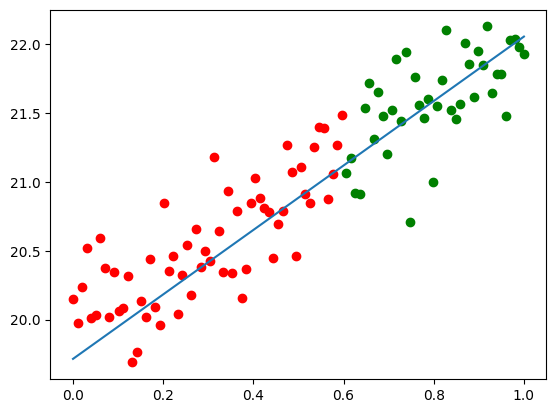

In [109]:
plt.plot(x_col, y_col, 'go',
         test_x, test_y, 'ro',
         [0, 1], [line_regression(beta_obj["b0"], beta_obj["b1"], 0), line_regression(beta_obj["b0"], beta_obj["b1"], 1)])

In [110]:
predictedY = []
for x in test_x:
    predictedY.append(line_regression(beta_obj["b0"], beta_obj["b1"], x))

loss = loss_function(predictedY, test_y)
loss

0.09585262291172118